<a href="https://colab.research.google.com/github/ameedahmed/K-Means-Using-Scikit-Learn/blob/main/Customer_Segmentation_To_Sell_More_Fish_to_Meat_Buyers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **K-Means Clustering**

**Business Case**: *We are currently negotiating with a prospective fish supplier who has offered us competitive pricing on their seafood products, contingent upon our commitment to purchase in larger quantities. Our objective is to augment fish sales at our retail locations by strategically marketing to our existing meat product consumers. The goal is to encourage a dietary shift towards seafood while ensuring minimal cannibalization of our current meat sales.*

In [2]:
#Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#Import the dataset
df = pd.read_csv('customer_segmentation.csv')
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [4]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [13]:
df_sliced = df[['Year_Birth','Income','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds','Kidhome','Teenhome','NumDealsPurchases',
                'NumWebPurchases','NumCatalogPurchases','NumStorePurchases','NumWebVisitsMonth','Recency']]
df_sliced.head()

,Year_Birth,Income,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,Kidhome,Teenhome,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Recency
0,1957,58138.0,546,172,88,88,0,0,3,8,10,4,7,58
1,1954,46344.0,6,2,1,6,1,1,2,1,1,2,5,38
2,1965,71613.0,127,111,21,42,0,0,1,8,2,10,4,26
3,1984,26646.0,20,10,3,5,1,0,2,2,0,4,6,26
4,1981,58293.0,118,46,27,15,1,0,5,5,3,6,5,94


In [15]:
import pandas as pd
from scipy.stats import pearsonr
y_variable = 'MntFishProducts'

# List of feature columns, excluding the y-variable column
feature_columns = [col for col in df_sliced.columns if col != y_variable]
df_sliced = df_sliced.dropna()
# Calculate correlation coefficient for each feature
for feature in feature_columns:
    correlation, _ = pearsonr(df_sliced[feature], df_sliced[y_variable])
    print(f'Correlation between {y_variable} and {feature}: {correlation:.3f}')

Correlation between MntFishProducts and Year_Birth: -0.040
Correlation between MntFishProducts and Income: 0.439
Correlation between MntFishProducts and MntMeatProducts: 0.574
Correlation between MntFishProducts and MntSweetProducts: 0.584
Correlation between MntFishProducts and MntGoldProds: 0.427
Correlation between MntFishProducts and Kidhome: -0.389
Correlation between MntFishProducts and Teenhome: -0.205
Correlation between MntFishProducts and NumDealsPurchases: -0.143
Correlation between MntFishProducts and NumWebPurchases: 0.300
Correlation between MntFishProducts and NumCatalogPurchases: 0.533
Correlation between MntFishProducts and NumStorePurchases: 0.458
Correlation between MntFishProducts and NumWebVisitsMonth: -0.446
Correlation between MntFishProducts and Recency: 0.001


In [17]:
import pandas as pd
from scipy.stats import pearsonr
y_variable = 'MntMeatProducts'

# List of feature columns, excluding the y-variable column
feature_columns = [col for col in df_sliced.columns if col != y_variable]
df_sliced = df_sliced.dropna()
# Calculate correlation coefficient for each feature
for feature in feature_columns:
    correlation, _ = pearsonr(df_sliced[feature], df_sliced[y_variable])
    print(f'Correlation between {y_variable} and {feature}: {correlation:.3f}')

Correlation between MntMeatProducts and Year_Birth: -0.034
Correlation between MntMeatProducts and Income: 0.585
Correlation between MntMeatProducts and MntFishProducts: 0.574
Correlation between MntMeatProducts and MntSweetProducts: 0.535
Correlation between MntMeatProducts and MntGoldProds: 0.359
Correlation between MntMeatProducts and Kidhome: -0.439
Correlation between MntMeatProducts and Teenhome: -0.261
Correlation between MntMeatProducts and NumDealsPurchases: -0.121
Correlation between MntMeatProducts and NumWebPurchases: 0.307
Correlation between MntMeatProducts and NumCatalogPurchases: 0.734
Correlation between MntMeatProducts and NumStorePurchases: 0.486
Correlation between MntMeatProducts and NumWebVisitsMonth: -0.539
Correlation between MntMeatProducts and Recency: 0.023


Performing a correlation test above helps us shortlist the columns that contribute towards our y-variable.

Using the conclusions from above, we take **MntMeatProducts** as Label, while the below listed columns as Features:

In [ ]:
#Based on the correlation results above, slice the dataset such that it only has significant variables.
df_sliced = df_sliced[['MntMeatProducts','Income','Kidhome','NumCatalogPurchases','NumStorePurchases']]

Now  we implement Elbow Method to identify optimal number of clusters. Use K-Means++ as Clustering Method as K-Means Clustering Methodology leads to sub-optimal results.


**How K-Means++ Works:**
1.   First select a centroid randomly from given datapoints
2.   Then calculate the distance of each point from the first centroid

1.  The point which has the maximum distance from the first centroid will be classified as a second centroid
2.  Now to find the third centroid, calculate the distance of each point from the first and second centroids. The datapoint having the maximum distance from the first and second centroid will be initialized as the third cluster centre. Rinse and repeat for 12 cluster centres

**How Elbow Method Works:**:

1.   First Start with a range of k-many clusters.
2.   Then for each cluster, calculate the sum of squared distances between each point and the centroid of its cluster, also known as WSS.
1.   After that plot a graph of WCSS against the number of clusters.
2.   Now look for the ‘elbow’ point where the rate of decrease sharply changes. This indicates that adding more clusters doesn’t significantly improve the fit of the model, rather it can lead to overfitting
1.   Finally, choose the k at the elbow as the optimal number of clusters, as further increases in clusters will result in diminishing returns in terms of WCSS reduction.


**The formula for WCSS/Loss Function is as follows**:
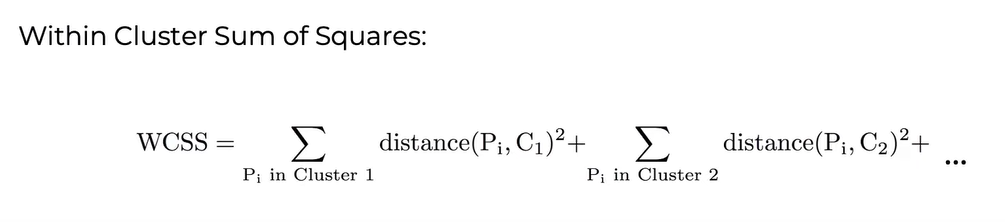

In [ ]:
#Now Implement Elbow Method To Identify Number of Clusters:
import sklearn.cluster as cluster
#Form an empty list to record loss values using wss as the metric
loss=[]
for i in range(1,13):
  kmeans = cluster.KMeans(n_clusters=i,init="k-means++")
  kmeans = kmeans.fit(df_sliced)
  wss_iter=kmeans.inertia_
  loss.append(wss_iter)

<Axes: xlabel='Clusters', ylabel='WSS'>

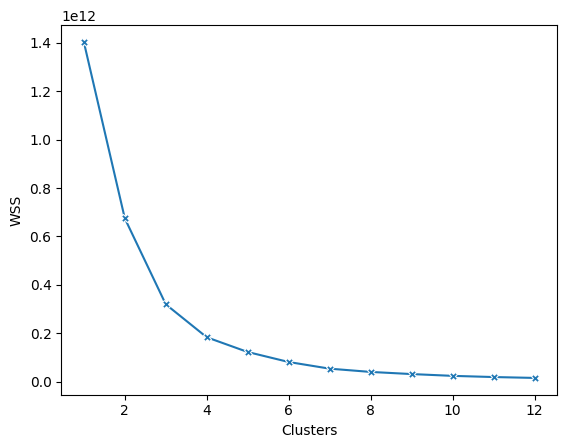

In [19]:
#Store the number of clusters and the loss scores in a dataframe for plotting
plotting = pd.DataFrame({'Clusters':range(1,13),'WSS':loss})
#Plot the graph
sns.lineplot(x='Clusters',y='WSS',data=plotting,marker="X")

**Hence, optimal number of clusters is 7.**

In [21]:
#Perform K-Means Clustering and Visualization when K=5:
kmeans = cluster.KMeans(n_clusters=7,init="k-means++")
kmeans = kmeans.fit(df_sliced)
df_sliced['Clusters'] = kmeans.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


# **Analyzing the Correlation Between Income Levels and Meat Consumption Patterns**

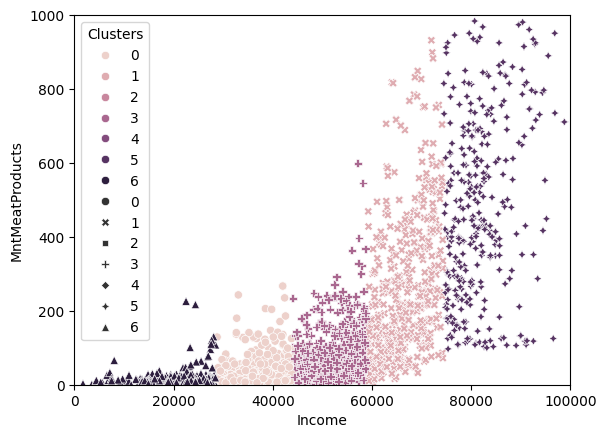

In [27]:
#Make a scatter plot:
sns.scatterplot(x="Income",y="MntMeatProducts",hue="Clusters",style='Clusters',data=df_sliced)
plt.xlim(0,100000)
plt.ylim(0,1000)
plt.show()

***Conclusion 2***: Focusing on individuals with an annual income exceeding $65,000 could enhance conversion rates, as they tend to purchase meat in larger quantities compared to those earning below this threshold. The correlation between lower income and reduced meat consumption may be attributed to various factors, including limited disposable income. However, the dataset at hand does not provide sufficient details to accurately determine the disposable income levels of customers

# **Analyzing correlation between meat eaters and their marital status**

In [ ]:
df_marital = df[['MntMeatProducts','Marital_Status']]
df_marital.groupby('Marital_Status').sum('MntMeatProducts')

,MntMeatProducts
Marital_Status,
Absurd,625
Alone,79
Divorced,34848
Married,138829
Single,87412
Together,97500
Widow,14575
YOLO,100


from matplotlib import pyplot as plt
_df_0['MntMeatProducts'].plot(kind='hist', bins=20, title='MntMeatProducts')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['MntMeatProducts'].plot(kind='line', figsize=(8, 4), title='MntMeatProducts')
plt.gca().spines[['top', 'right']].set_visible(False)

# **Meat Purchasing Habits of People Who Have Kids vs No Kids**

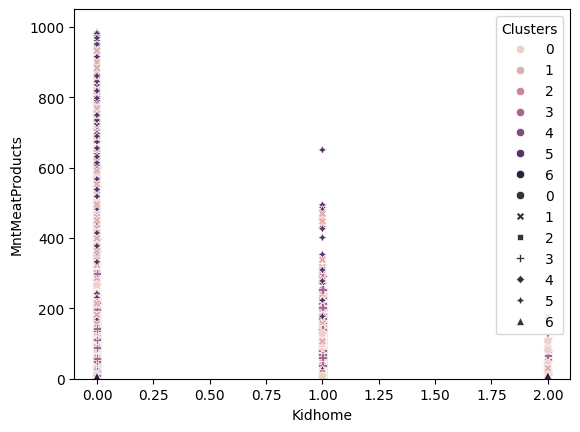

In [31]:
#Make a scatter plot:
sns.scatterplot(x="Kidhome",y="MntMeatProducts",hue="Clusters",style='Clusters',data=df_sliced)
plt.ylim(0,1050)
plt.show()

***Conclusion 3***: Individuals with no kids often purchase more meat than those with kids at home. This trend may be influenced by various factors not covered in this project. Notably, one plausible explanation is the greater disposable income typically available to people with no children under their care. In contrast, families with children may have more financial constraints. Consequently, our marketing strategy will prioritize targeting demographics such as Widow, Together, Single, Married and Divorced with no kids at home


# **Categorizing Customers as per their Catalog Purchases**

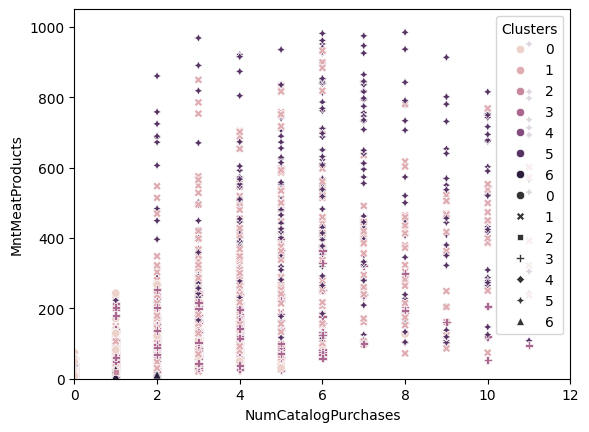

In [34]:
#Make a scatter plot:
sns.scatterplot(x="NumCatalogPurchases",y="MntMeatProducts",hue="Clusters",style='Clusters',data=df_sliced)
plt.xlim(0,12)
plt.ylim(0,1050)
plt.show()

***Conclusion 4***: The data suggests a significant correlation between meat purchases and the use of coupons. Although not directly covered in our dataset, this trend may be attributed to the prevalence of meat promotions in our product catalog. To capitalize on this insight, we propose a strategic marketing initiative: offering a 10% discount on any fish product to customers who buy meat. This approach aims to expand our customer base within the seafood segment while leveraging existing buying patterns

# **Final Profiling of Customers**

To pivot meat consumers to fish and engage our new supplier, we’ve identified key demographics:



1.   Focus on childless individuals, including married, cohabiting, widowed, or single persons.
2.   Target those with an annual income of at least $65,000.
1.   Target customers who use coupons for meat purchases and incentivize them to explore our seafood selection by providing a special offer—a discount on their choice of fish products with their meat purchase